In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
odd_Age = []
for i in range(1, 100):
    odd_male = math.exp(-1+0.02*i+1)
    odd_fem = math.exp(-1+0.02*i)
    empty_list = [i, odd_male, odd_fem]
    odd_Age.append(empty_list)

odd_Age = pd.DataFrame(odd_Age)
odd_Age.columns= ['Age', 'male_odd', 'Female_odd']

In [3]:
odd_Age.head()

,Age,male_odd,Female_odd
0,1,1.020201,0.375311
1,2,1.040811,0.382893
2,3,1.061837,0.390628
3,4,1.083287,0.398519
4,5,1.105171,0.406570


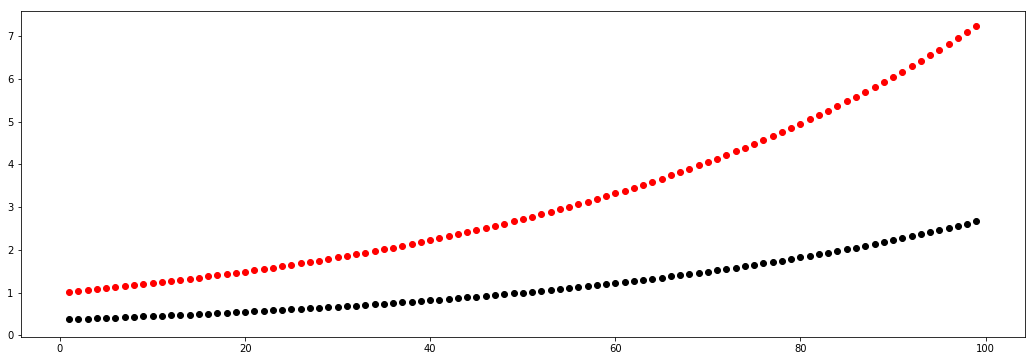

In [4]:
f, (ax1) = plt.subplots(1, 1, sharey='all', figsize=(18,6))

ax1.scatter(odd_Age['Age'], odd_Age['male_odd'], color='r')
ax1.scatter(odd_Age['Age'], odd_Age['Female_odd'], color='k')
plt.show()

In [5]:
print('Female age 95 odd:' + str(odd_Age['Female_odd'][odd_Age.Age == 95]))
print('Male age 50 odd:' + str(odd_Age['male_odd'][odd_Age.Age == 50]))

Female age 95 odd:94    2.459603
Name: Female_odd, dtype: float64
Male age 50 odd:49    2.718282
Name: male_odd, dtype: float64


Odds of hearing loss increases exponetialy as age increases for both male and female but at different rate. Males are losing hear at much greater rate. A 95 year old women is less like to develop hearing problem (with an odd of 2.46) than 50 years old man (with an odds of 2.72).

In [6]:
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

C:\Users\ktser\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


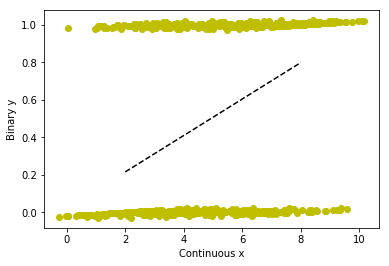

In [33]:
# Set the random seed so that the 'random' data is the same each time
# the code is run.
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    }) 
    df = df.append(tmp)

# Continuous predictor.
x = df['x']

# Binary outcome.
bin_y = df['y']

# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,bin_y,1)

# Work as a function to return the predicted value of y.
fit_fn = np.poly1d(fit)

# Add a little 'noise' to the data for graphing purposes.
jitter = np.random.randn(700)

# Display our results.
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()

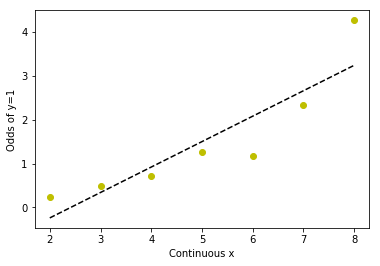

In [8]:
# Unique values in x.
xvals = x.unique()

# Calculate and store the odds.
yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  # The number of trials y = 1.
    y0_ct = len(bin_y[x == xi]) - y1_ct  # The number of trials y = 0.
    yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
    
# Calculate linear regression for x and yodds.
fit = np.polyfit(xvals, yodds, 1)

# Work as a function to return the predicted value of yodds.
fit_fn = np.poly1d(fit)

# Display our work.
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


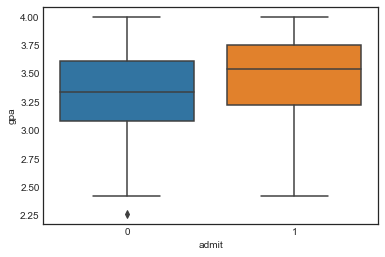

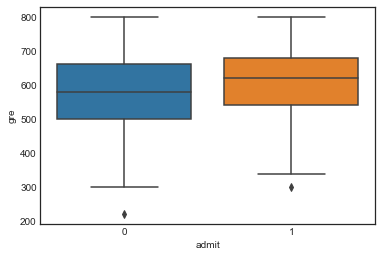

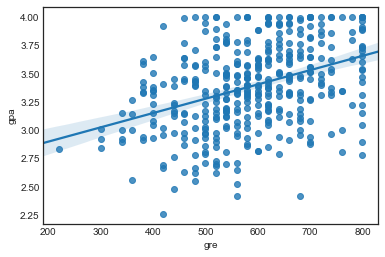

In [38]:
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

# Take a peek.
print(df.head())

# Prettier plots are better.
sns.set_style("white")

# Bivariate relationships of predictors to admissions outcome.
sns.boxplot(x="admit", y="gpa", data=df)
plt.show()
sns.boxplot(x="admit", y="gre", data=df)
plt.show()

# Relationship between predictors.
sns.regplot(x='gre', y='gpa', data=df)
plt.show()

In [130]:
import seaborn as sns
# Read in the data.
df = pd.read_csv("https://www.dropbox.com/s/qhf0ocdqb3gh7ni/logistic_regression.csv?dl=1") 

In [135]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [148]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=3)
y = df['admit']
X = df[['gpa','gre', 'rank']]

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

Coefficients
[[ 0.48443175  0.00196745 -0.59296058]]
[-2.15902055]

 Accuracy by admission status
admit    0    1
row_0          
0      257  100
1       16   27

 Percentage accuracy
0.71


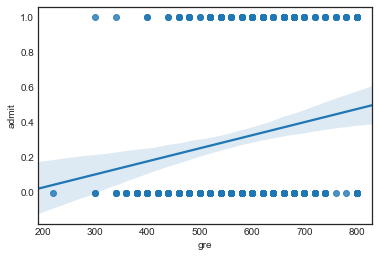

In [129]:
# Relationship between predictors and outcome
sns.regplot(x='gre', y='admit', data=df)
plt.show()

In [132]:
# Unique values in admitreq.

aReq = df['gre'].unique()

admitodds = []
for xi in aReq: 
    y1_ct = df['gre'][df['gre'] == xi].sum()  # The number of trials y = 1.
    y0_ct = len(df[df['gre'] == xi]) - y1_ct  # The number of trials y = 0.
    admitodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.

In [133]:

admitodds

[-1.0026385224274406,
 -1.0015174506828528,
 -1.0012515644555695,
 -1.001564945226917,
 -1.001926782273603,
 -1.0013175230566536,
 -1.0017889087656529,
 -1.0025062656641603,
 -1.0018552875695732,
 -1.0014306151645207,
 -1.0022779043280183,
 -1.0020876826722338,
 -1.0012836970474968,
 -1.0027855153203342,
 -1.002004008016032,
 -1.001669449081803,
 -1.0014727540500736,
 -1.001615508885299,
 -1.001727115716753,
 -1.0021786492374727,
 -1.0013531799729365,
 -1.0033444816053512,
 -1.0013908205841446,
 -1.0029498525073746,
 -1.0023866348448687,
 -1.004566210045662]

In [134]:
# Relationship between predictors and outcome
sns.regplot(x=aReq, y=admitodds)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index